In [1]:
# created by Wenlong Nov 25 2017.
# to check the need to evaluate recommendation system based on time interval

In [1]:
import pandas as pd
from decimal import Decimal
import numpy as np
import matplotlib.pylab as plt
import datetime
from numpy.linalg import inv

import numpy as np
from sklearn.decomposition import NMF

import os
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')


In [2]:
## numba to speed the 
from operator import mul
import numpy as np
from numba import typeof, double, int_
from numba.decorators import jit
from numba import njit
import math
import pickle
from scipy import spatial

In [3]:
## change the plot style
import matplotlib as mpl
# mpl.style.use('classic')
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline

In [4]:
### work with synthetic data
num_user = 500
num_item = 500
ratings = np.zeros((num_user,num_item))
for u in range(num_user):
    au  = np.random.normal(3,1,1)
    bu = np.random.normal(0.5,0.5, 1)
    for i in range(num_item):
        ti = np.random.normal(0.1,1,1)
        eij = np.random.normal(0,1,1)

        a= au+bu*ti+0.5*eij
        ratings[u][i]= max(min(round(a[0]),5),1)

column_names=['item'+str(j) for j in range(ratings.shape[1])]
indexes = ['user'+str(i) for i in range(ratings.shape[0])]
Data = pd.DataFrame(ratings,index=indexes,columns=column_names)


Time_range = 40  ## split the ratings into 40 time range
column_names=['item'+str(j) for j in range(ratings.shape[1])]
indexes = ['user'+str(i) for i in range(ratings.shape[0])]
rated_time = np.random.randint(1,Time_range,size=(ratings.shape[0],ratings.shape[1]))
Rated_Time = pd.DataFrame(rated_time,index=indexes,columns=column_names)
Data_time = Rated_Time
       
## global pars

add_num=10

In [ ]:
## get the unique testing for all different debias strateies
temp = Data_time[(27 <= Data_time) & (Data_time <= 30)]
test_mask = temp.values>0
test_df = pd.DataFrame(Data.values*test_mask,index=Data.index,columns=Data.columns)

## 

N = Data.shape[0]
M = Data.shape[1]
K=10

# Random Selection 
train_error_random,test_error_random,gini_random= Conventional_MF_random(add_num)

# # # # # ### Conventional MF
train_error_regular,test_error_regular,gini_regula = Conventional_MF(add_num)

# # # blind spot aware MF
P = np.random.rand(N,K)
Q = np.random.rand(M,K)
train_error_BL_aware, test_error_BL_aware,gini_BL_aware = BlindSpotAware_MF(P,Q,add_num)


# # # ### popularity propensity MF
P = np.random.rand(N,K)
Q = np.random.rand(M,K)
train_error_popularity_propensityMF, test_error_popularity_propensityMF, gini_popularity_propensityMF= Popularity_propensityMF(P,Q,add_num)

# # # # Poisson propensity MF
P = np.random.rand(N,K)
Q = np.random.rand(M,K)
train_error_poisson_propensityMF, test_error_poisson_propensityMF,gini_poisson_propensityMF= Poisson_propensityMF(P,Q,add_num)

# # ## Conventional MF + active learning + theta = 3.5
train_error_ConMF_AL_theta1, test_error_ConMF_AL_theta1, gini_ConMF_AL_theta1, = ConventionalMF_AL(add_num,theta=3.5)
# ### Conventional MF + active learning + theta= 4
train_error_ConMF_AL_theta2, test_error_ConMF_AL_theta2, gini_ConMF_AL_theta2 = ConventionalMF_AL(add_num,theta=4)
### Conventional MF + active learning + theta = 4.5
train_error_ConMF_AL_theta3, test_error_ConMF_AL_theta3, gini_ConMF_AL_theta3= ConventionalMF_AL(add_num,theta=4.5)

# ### Popularity propensity MF + active learning +theta = 3.5
P = np.random.rand(N,K)
Q = np.random.rand(M,K)
train_error_Popu_PMF_AL_theta1, test_error_Popu_PMF_AL_theta1, gini_Popu_PMF_AL_theta1= Popularity_propensityMF_AL(P,Q,add_num,theta=3.5)

### Popularity propensity MF + active learning +theta = 4
P = np.random.rand(N,K)
Q = np.random.rand(M,K)
train_error_Popu_PMF_AL_theta2, test_error_Popu_PMF_AL_theta2, gini_Popu_PMF_AL_theta2= Popularity_propensityMF_AL(P,Q,add_num,theta=4)

### Popularity propensity MF + active learning +theta = 4.5
P = np.random.rand(N,K)
Q = np.random.rand(M,K)
train_error_Popu_PMF_AL_theta3, test_error_Popu_PMF_AL_theta3, gini_Popu_PMF_AL_theta3= Popularity_propensityMF_AL(P,Q,add_num,theta=4.5)

# ## Poisson propensity MF + active learning +theta = 3.5
P = np.random.rand(N,K)
Q = np.random.rand(M,K)
train_error_Pois_PMF_AL_theta1, test_error_Pois_PMF_AL_theta1, gini_Pois_PMF_AL_theta1= Poisson_propensityMF_AL(P,Q,add_num,theta=3.5)

## Poisson propensity MF + active learning +theta = 4
P = np.random.rand(N,K)
Q = np.random.rand(M,K)
train_error_Pois_PMF_AL_theta2, test_error_Pois_PMF_AL_theta2, gini_Pois_PMF_AL_theta2= Poisson_propensityMF_AL(P,Q,add_num,theta=4)

### Poisson propensity MF + active learning +theta = 4.5
P = np.random.rand(N,K)
Q = np.random.rand(M,K)
train_error_Pois_PMF_AL_theta3, test_error_Pois_PMF_AL_theta3, gini_Pois_PMF_AL_theta3= Poisson_propensityMF_AL(P,Q,add_num,theta=4.5)


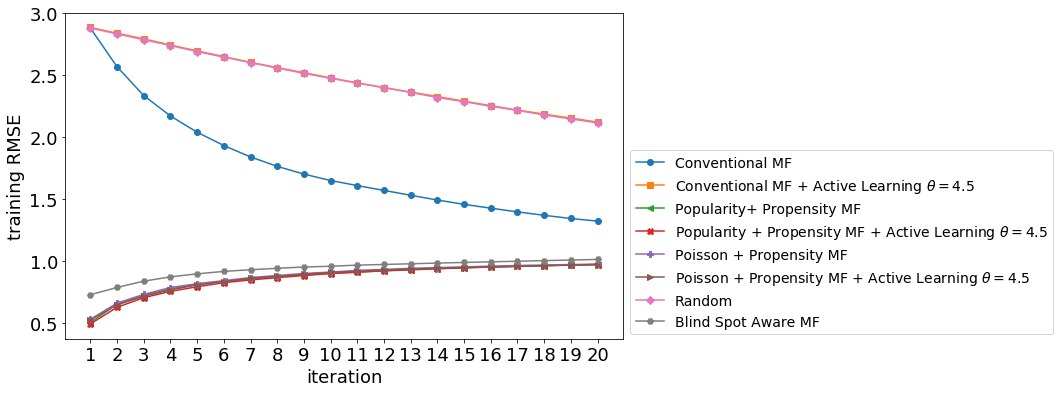

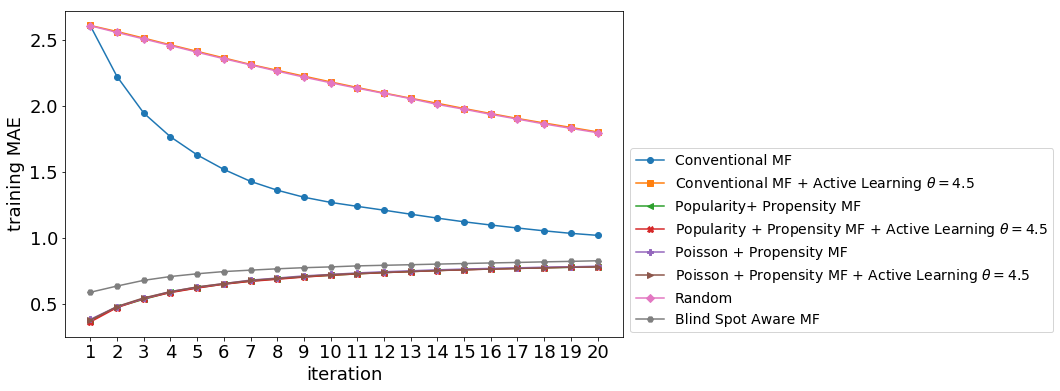

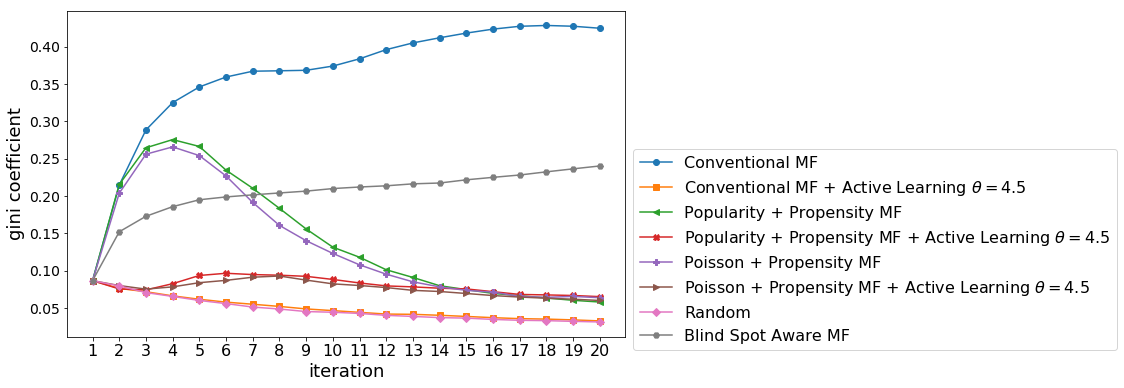

In [31]:
### plot RMSE
# plt.figure(figsize=(16,10))
plt.figure(figsize=(10,6))
plt.plot(np.array(train_error_regular)[:,0],label='Conventional MF',marker='o')
plt.plot(np.array(train_error_ConMF_AL_theta3)[:,0],label='Conventional MF + Active Learning '+ r'$\theta=4.5$',marker='s')
plt.plot(np.array(train_error_popularity_propensityMF)[:,0], label='Popularity+ Propensity MF',marker='<')
plt.plot(np.array(train_error_Popu_PMF_AL_theta3)[:,0],label='Popularity + Propensity MF + Active Learning '+r'$\theta=4.5$',marker='X')
plt.plot(np.array(train_error_poisson_propensityMF)[:,0], label='Poisson + Propensity MF', marker='P' )
plt.plot(np.array(train_error_Pois_PMF_AL_theta3)[:,0], label='Poisson + Propensity MF + Active Learning '+r'$\theta=4.5$', marker='>' )
plt.plot(np.array(train_error_random)[:,0], label='Random', marker='D')
plt.plot(np.array(train_error_BL_aware)[:,0],label='Blind Spot Aware MF', marker='H')
plt.legend(bbox_to_anchor=(1, 0.6),fontsize=14)
plt.xlabel('iteration',fontsize=18)
plt.ylabel('training RMSE',fontsize=18)
plt.xticks(range(0,20),[str(i+1) for i in range(0,20)],fontsize=18)
plt.yticks(fontsize=18)
plt.show()


### plot MAE
# plt.figure(figsize=(16,10))
plt.figure(figsize=(10,6))
plt.plot(np.array(train_error_regular)[:,1],label='Conventional MF',marker='o')
plt.plot(np.array(train_error_ConMF_AL_theta3)[:,1],label='Conventional MF + Active Learning '+ r'$\theta=4.5$',marker='s')
plt.plot(np.array(train_error_popularity_propensityMF)[:,1], label='Popularity+ Propensity MF',marker='<')
plt.plot(np.array(train_error_Popu_PMF_AL_theta3)[:,1],label='Popularity + Propensity MF + Active Learning '+r'$\theta=4.5$',marker='X')
plt.plot(np.array(train_error_poisson_propensityMF)[:,1], label='Poisson + Propensity MF', marker='P' )
plt.plot(np.array(train_error_Pois_PMF_AL_theta3)[:,1], label='Poisson + Propensity MF + Active Learning '+r'$\theta=4.5$', marker='>' )
plt.plot(np.array(train_error_random)[:,1], label='Random', marker='D')
plt.plot(np.array(train_error_BL_aware)[:,1],label='Blind Spot Aware MF', marker='H')
plt.legend(bbox_to_anchor=(1, 0.6),fontsize=14)
plt.xlabel('iteration',fontsize=18)
plt.ylabel('training MAE',fontsize=18)
plt.xticks(range(0,20),[str(i+1) for i in range(0,20)],fontsize=18)
plt.yticks(fontsize=18)
plt.show()

### plot gini 
plt.figure(figsize=(10,6))
plt.plot(gini_regula,label='Conventional MF',marker='o')
plt.plot(gini_ConMF_AL_theta3,label='Conventional MF + Active Learning '+ r'$\theta=4.5$',marker='s')
plt.plot(gini_popularity_propensityMF, label='Popularity + Propensity MF',marker='<')
plt.plot(gini_Popu_PMF_AL_theta3,label='Popularity + Propensity MF + Active Learning '+ r'$\theta=4.5$',marker='X')
plt.plot(gini_poisson_propensityMF, label='Poisson + Propensity MF',marker='P')
plt.plot(gini_Pois_PMF_AL_theta3,label='Poisson + Propensity MF + Active Learning '+ r'$\theta=4.5$',marker='>')
plt.plot(gini_random,label='Random', marker='D')
plt.plot(gini_BL_aware, label='Blind Spot Aware MF', marker='H')
plt.legend(bbox_to_anchor=(1, 0.6),fontsize=16) # loc="upper right", 
plt.xlabel('iteration',fontsize=18)
plt.ylabel('gini coefficient',fontsize=18)
plt.xticks(range(0,20),[str(i+1) for i in range(0,20)],fontsize=16)
plt.yticks(fontsize=14)
# plt.ylim([0,1])
plt.show()

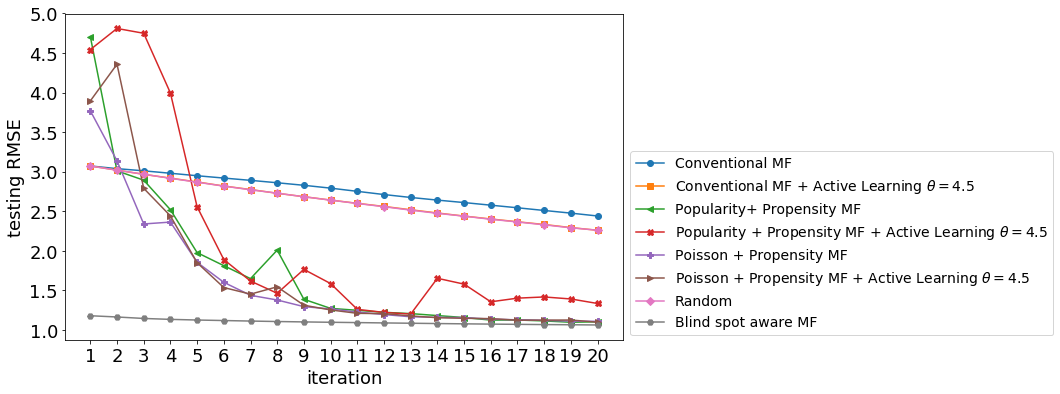

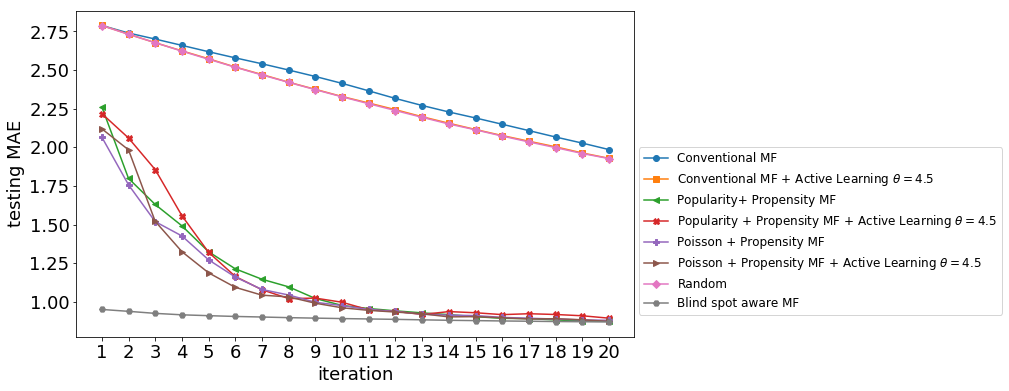

In [32]:
# plt.figure(figsize=(16,10))
plt.figure(figsize=(10,6))
plt.plot(np.array(test_error_regular)[:,0],label='Conventional MF',marker='o')
plt.plot(np.array(test_error_ConMF_AL_theta3)[:,0],label='Conventional MF + Active Learning '+ r'$\theta=4.5$',marker='s')
plt.plot(np.array(test_error_popularity_propensityMF)[:,0], label='Popularity+ Propensity MF',marker='<')
plt.plot(np.array(test_error_Popu_PMF_AL_theta3)[:,0],label='Popularity + Propensity MF + Active Learning '+r'$\theta=4.5$',marker='X')
plt.plot(np.array(test_error_poisson_propensityMF)[:,0], label='Poisson + Propensity MF', marker='P' )
plt.plot(np.array(test_error_Pois_PMF_AL_theta3)[:,0], label='Poisson + Propensity MF + Active Learning '+r'$\theta=4.5$', marker='>' )
plt.plot(np.array(test_error_random)[:,0], label='Random', marker='D')
plt.plot(np.array(test_error_BL_aware)[:,0],label='Blind spot aware MF',marker='H')
plt.legend(bbox_to_anchor=(1, 0.6),fontsize=14)
plt.xlabel('iteration',fontsize=18)
plt.ylabel('testing RMSE',fontsize=18)
plt.xticks(range(0,20),[str(i+1) for i in range(0,20)],fontsize=18)
plt.yticks(fontsize=18)
plt.show()


### plot MAE
# plt.figure(figsize=(16,10))
plt.figure(figsize=(10,6))
plt.plot(np.array(test_error_regular)[:,1],label='Conventional MF',marker='o')
plt.plot(np.array(test_error_ConMF_AL_theta3)[:,1],label='Conventional MF + Active Learning '+ r'$\theta=4.5$',marker='s')
plt.plot(np.array(test_error_popularity_propensityMF)[:,1], label='Popularity+ Propensity MF',marker='<')
plt.plot(np.array(test_error_Popu_PMF_AL_theta3)[:,1],label='Popularity + Propensity MF + Active Learning '+r'$\theta=4.5$',marker='X')
plt.plot(np.array(test_error_poisson_propensityMF)[:,1], label='Poisson + Propensity MF', marker='P' )
plt.plot(np.array(test_error_Pois_PMF_AL_theta3)[:,1], label='Poisson + Propensity MF + Active Learning '+r'$\theta=4.5$', marker='>' )
plt.plot(np.array(test_error_random)[:,1], label='Random', marker='D')
plt.plot(np.array(test_error_BL_aware)[:,1],label='Blind spot aware MF',marker='H')
plt.legend(bbox_to_anchor=(1.67, 0.6),fontsize=12)
plt.xlabel('iteration',fontsize=18)
plt.ylabel('testing MAE',fontsize=18)
plt.xticks(range(0,20),[str(i+1) for i in range(0,20)],fontsize=18)
plt.yticks(fontsize=18)
# plt.ylim([0,7.5])
plt.show()

#  All my FUNCTIONS!

In [7]:
@jit()
def get_top_n_list_for_users(P,Q,training,topn):
    eR = np.dot(P,Q)
    Pl1_MF=[0]
    for i,row in enumerate(np.dot(P,P.T)):
        Pl1_MF.append(np.sqrt(row[i]))
    Pl1_MF = Pl1_MF[1:]
        
    Ql1_MF=[0]
    for i,row in enumerate(np.dot(Q.T,Q)):
        Ql1_MF.append(np.sqrt(row[i]))
    Ql1_MF = Ql1_MF[1:]
        
    for i in range(eR.shape[0]):
        for j in range(eR.shape[1]):
            eR[i][j]= eR[i][j]/(Pl1_MF[i]*Ql1_MF[j])
    recommended_items = [0]     
    training_mask = training.values>0
    eR_new = eR*(~training_mask)
#     print type(eR)
#     print type(eR_new)
#     print eR.shape, eR_new.shape
    for i in range(training.shape[0]):
            #for j in range(len(eR[0])):
        sorted_ind = np.argsort(eR_new[i])[::-1]  # sorting the calculated ratings in the descending order for user i
        top_5 = sorted_ind[0:topn]  # get the 5 items with highest predicted ratings # can change to top 10, so on if you want
        recommended_items.append(top_5)
    return recommended_items[1:]

In [8]:
@jit()
def evaluate(training,test,topN,recoms,user_latent, item_latent, propensity,threshold):
    prec = [0]
    recall = [0]
    
    train = training.values

    diversity_pre = [0]
    novelty_pre = [0]
    for i,recs in enumerate(recoms):
        p = 0.0
        x = 0.0
        temp = 1.0
        diversity = 0.0
        novelty = 0.0
        count = 0.0
        for j in recs:
            if test[i][j] >0: #relavant
                p+=1
            ## check the minimal distance between recommended items
            
            for k in recs:
                if k!=j:
                    temp = min(temp, 1-spatial.distance.cosine(train[:,k], train[:,j]))
            novelty += (1.0-propensity[0][j])
            count+=1
        diversity+= temp
        if len(np.where(test[i]>0)[0])>0:
            prec.append( p/topN)
            recall.append(p/len(np.where(test[i]>0)[0]))
        diversity_pre.append(diversity)
        novelty_pre.append(novelty/count)
        
    return np.mean(prec[1:]),np.mean(recall[1:]), np.mean(diversity_pre[1:]), np.mean(novelty_pre[1:])

In [9]:
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq: http://www.statsdirect.com/help/content/image/stat0206_wmf.gif
    # from: http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    array = array.flatten() #all values are treated equally, arrays must be 1d
    if np.amin(array) < 0:
        array -= np.amin(array) #values cannot be negative
    array += 0.0000001 #values cannot be 0
    array = np.sort(array) #values must be sorted
    index = np.arange(1,array.shape[0]+1) #index per array element
    n = array.shape[0]#number of array elements
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) #Gini coefficient

In [10]:
### get propensity based on poisson matrix factorization 
### using Poisson matrix factorization to calculate probability of being seen by user u for item i 
from hpfrec import HPF
def calculate_propensity_poissonMF(train_mask_df):
    train_df =[]
    for index, row in train_mask_df.iterrows():
        for i in train_mask_df.columns:
            if row[i]==1:
                train_df.append([index, i, 1])
            else:
                train_df.append([index, i, 0 ])

    train_df = pd.DataFrame(train_df,columns=['UserId','ItemId','Count'])


    recommender = HPF(k=10, full_llk=False,check_every=10, maxiter=50, reindex=True,allow_inconsistent_math=True, ncores=24)
    
    recommender.fit(train_df)
    R_hat  = np.dot(recommender.Theta,recommender.Beta.T)
    propen_MF = 1-np.exp(-R_hat)
    
    return propen_MF

# Random Selection

In [11]:
@jit()
def Conventional_MF_random(addnum):
    training_error_regular = [0]
    testing_error_regular = [0]
    gini_regular = [0]
    bs_percentile_conv_MF = [0]
    
    ndcg5 = [0]
    diversity = [0]
    novelty = [0]
    topN = 20
    threshold = 0.1  ## the most popular times threshold 
    
    popularity_aggregate_regular = pd.DataFrame(columns=Data_time.columns)
    time_mask = Data_time.values<=3 ### provide the first time rating matrix
    ## testing set
    ##
    for t in range(1,21):
        print('time'+str(t))
        R_df = pd.DataFrame(Data.values*time_mask,index=Data.index,columns=Data.columns)
        ## drop any row or column, that they have all zeros
#         R_df = R_df[(R_df.T != 0).any()]  # remove all zeros row
#         R_df = R_df.loc[:,(R_df != 0).any(axis=0)]  # remove all zeros column
        prop_score = calculate_popularity_model(R_df,t)  
    #     ### with NMF from sklearn
        model = NMF(n_components=10, init='random', max_iter=200)
        W = model.fit_transform(R_df.values)
        H = model.components_
        pred = np.dot(W, H)
        pred_data = pd.DataFrame(pred,index=R_df.index,columns=R_df.columns)

        popularity_aggregate_regular = popularity_aggregate_regular.append(prop_score)
        t1 = prop_score.values.tolist()
        IversPropensity = []
        for i in range(Data.shape[0]):
            IversPropensity.append(t1)

        ###### calculate gini score 
        gini_score = gini(prop_score.values/np.sum(prop_score.values))
        gini_regular.append(gini_score)
#         print gini_score

#         ### error for training
        mask = R_df.values>0
        rmse= np.sqrt(np.sum(np.power(pred-R_df.values,2)*mask)/np.sum(mask))
        print('RMSE on training set: ' + str(rmse))
        mae= np.sum(np.abs(pred-R_df.values)*mask)/np.sum(mask)
        print('MAE on training set: ' + str(mae))
        training_error_regular.append([rmse,mae])
        
        

        #### select the top 10 item for each user
        #### change the mask (set cell to True which are selected to present to user)
        ## choose 10 item every time to a user
        num= addnum
        candidate_index = ~time_mask  ## convert all candidate index to True
        candidate_rating = pred_data*candidate_index ## get predicte rating on those candidate index
        sorted_ind = np.argsort(-candidate_rating,axis=1).iloc[:,:] ## get the index of each row, where top n pred are selected
        row_num = 0
        for index, row in sorted_ind.iterrows():
            ### choose random items with length of num
            lis = row.values.tolist()
#             print lis
            item_selected = np.random.choice(lis, num,replace=False)
#             print item_selected
            candidate_index[row_num,item_selected] = False  ## remove those selected item from candidate pool 
            row_num = row_num+1
        time_mask = ~candidate_index  ## get the new index 
        
        ### check result on testing set
        rmse= np.sqrt(np.sum(np.power(pred-test_df.values,2)*test_mask)/np.sum(test_mask))
        print('RMSE on testing set: ' + str(rmse))
        mae= np.sum(np.abs(pred-test_df.values)*test_mask)/np.sum(test_mask)
        print('MAE on testing set: ' + str(mae))
        testing_error_regular.append([rmse,mae])
        
    return training_error_regular[1:],testing_error_regular[1:],gini_regular[1:]

# Conventional MF

In [12]:
@jit()
def Conventional_MF(addnum):
    
    training_error_regular = [0]
    testing_error_regular = [0]
    gini_regular = [0]
    bs_percentile_conv_MF = [0]
    
    diversity = [0]
    novelty = [0]
    topN = 20
    threshold = 0.1  ## the most popular times threshold 

    popularity_aggregate_regular = pd.DataFrame(columns=Data_time.columns)
    time_mask = Data_time.values<=3 ### provide the first time rating matrix
    ## testing set
    ##
    for t in range(1,21):
        print('time'+str(t))
        R_df = pd.DataFrame(Data.values*time_mask,index=Data.index,columns=Data.columns)
        ## drop any row or column, that they have all zeros
#         R_df = R_df[(R_df.T != 0).any()]  # remove all zeros row
#         R_df = R_df.loc[:,(R_df != 0).any(axis=0)]  # remove all zeros column
        prop_score = calculate_popularity_model(R_df,t)  
    #     ### with NMF from sklearn
        model = NMF(n_components=10, init='random', max_iter=200)
        W = model.fit_transform(R_df.values)
        H = model.components_
        pred = np.dot(W, H)
        pred_data = pd.DataFrame(pred,index=R_df.index,columns=R_df.columns)

#         print '#####################################'
        ## check diversity
        rec_ratings= get_top_n_list_for_users(W,H, R_df,topN)
        thre = np.max(prop_score.values.tolist())*(1-threshold)
        mean_prec, mean_recall, mean_diversity, mean_novelty = evaluate(R_df, test_df.values,topN,rec_ratings,W,H,prop_score.values.tolist(),thre)
        diversity.append(mean_diversity)
        novelty.append(mean_novelty)
        print('diversity:' +str(mean_diversity))


        popularity_aggregate_regular = popularity_aggregate_regular.append(prop_score)
        t1 = prop_score.values.tolist()
        IversPropensity = []
        for i in range(Data.shape[0]):
            IversPropensity.append(t1)

        ###### calculate gini score 
        gini_score = gini(prop_score.values/np.sum(prop_score.values))
        gini_regular.append(gini_score)
        print(gini_score)

#         ### error for training
        mask = R_df.values>0
        rmse= np.sqrt(np.sum(np.power(pred-R_df.values,2)*mask)/np.sum(mask))
        print('RMSE on training set: ' + str(rmse))
        mae= np.sum(np.abs(pred-R_df.values)*mask)/np.sum(mask)
        print('MAE on training set: ' + str(mae))
        training_error_regular.append([rmse,mae])

        #### select the top 10 item for each user
        #### change the mask (set cell to True which are selected to present to user)
        ## choose 10 item every time to a user
        num=addnum
        candidate_index = ~time_mask  ## convert all candidate index to True
        candidate_rating = pred_data*candidate_index ## get predicte rating on those candidate index
        sorted_ind = np.argsort(-candidate_rating,axis=1).iloc[:,:num] ## get the index of each row, where top n pred are selected
        row_num = 0
#         print type(sorted_ind)
#         print sorted_ind
        for index, row in sorted_ind.iterrows():
            ### choose random items with length of num
            item_selected = row.values.tolist()
            candidate_index[row_num,item_selected] = False  ## remove those selected item from candidate pool 
            row_num = row_num+1
        time_mask = ~candidate_index  ## get the new index
        
        ### check result on testing set
        rmse= np.sqrt(np.sum(np.power(pred-test_df.values,2)*test_mask)/np.sum(test_mask))
        print('RMSE on testing set: ' + str(rmse))
        mae= np.sum(np.abs(pred-test_df.values)*test_mask)/np.sum(test_mask)
        print('MAE on testing set: ' + str(mae))
        testing_error_regular.append([rmse,mae])
        
    return training_error_regular[1:],testing_error_regular[1:],gini_regular[1:]

# Blind spot aware MF

In [13]:
@jit()
def BlindSpotAware_MF(P,Q,add_num):
    
    training_error_regular = [0]
    testing_error_regular = [0]
    gini_regular = [0]
    bs_percentile_conv_MF = [0]
    
    diversity = [0]
    novelty = [0]
    topN = 20
    threshold = 0.1  ## the most popular times threshold 

    popularity_aggregate_regular = pd.DataFrame(columns=Data_time.columns)
    time_mask = Data_time.values<=3 ### provide the first time rating matrix
    ## testing set
    ##
    for t in range(1,21):
        print('time'+str(t))
        R_df = pd.DataFrame(Data.values*time_mask,index=Data.index,columns=Data.columns)
        ## drop any row or column, that they have all zeros
#         R_df = R_df[(R_df.T != 0).any()]  # remove all zeros row
#         R_df = R_df.loc[:,(R_df != 0).any(axis=0)]  # remove all zeros column
        prop_score = calculate_popularity_model(R_df,t)  
        W,H,a,b = blindspot_awarness_matrix_factorization(R_df.values, P, Q, 10,0.2)
        pred = np.dot(W, H)
        pred_data = pd.DataFrame(pred,index=R_df.index,columns=R_df.columns)      
        
        popularity_aggregate_regular = popularity_aggregate_regular.append(prop_score)
        t1 = prop_score.values.tolist()
        IversPropensity = []
        for i in range(Data.shape[0]):
            IversPropensity.append(t1)

        ###### calculate gini score 
        gini_score = gini(prop_score.values/np.sum(prop_score.values))
        gini_regular.append(gini_score)
        print(gini_score)

#         ### error for training
        mask = R_df.values>0
        rmse= np.sqrt(np.sum(np.power(pred-R_df.values,2)*mask)/np.sum(mask))
        print('RMSE on training set: ' + str(rmse))
        mae= np.sum(np.abs(pred-R_df.values)*mask)/np.sum(mask)
        print('MAE on training set: ' + str(mae))
        training_error_regular.append([rmse,mae])

        #### select the top 10 item for each user
        #### change the mask (set cell to True which are selected to present to user)
        ## choose 10 item every time to a user
        num=add_num
        candidate_index = ~time_mask  ## convert all candidate index to True
        candidate_rating = pred_data*candidate_index ## get predicte rating on those candidate index
        sorted_ind = np.argsort(-candidate_rating,axis=1).iloc[:,:num] ## get the index of each row, where top n pred are selected
        row_num = 0
#         print type(sorted_ind)
#         print sorted_ind
        for index, row in sorted_ind.iterrows():
            ### choose random items with length of num
            item_selected = row.values.tolist()
            candidate_index[row_num,item_selected] = False  ## remove those selected item from candidate pool 
            row_num = row_num+1
        time_mask = ~candidate_index  ## get the new index

        ### check result on testing set
        rmse= np.sqrt(np.sum(np.power(pred-test_df.values,2)*test_mask)/np.sum(test_mask))
        print('RMSE on testing set: ' + str(rmse))
        mae= np.sum(np.abs(pred-test_df.values)*test_mask)/np.sum(test_mask)
        print('MAE on testing set: ' + str(mae))
        testing_error_regular.append([rmse,mae])
        
    return training_error_regular[1:],testing_error_regular[1:],gini_regular[1:]

# Popularity Propensity MF

In [14]:
@jit()
def Popularity_propensityMF(P,Q,add_num):
    training_error_regular = [0]
    testing_error_regular = [0]
    gini_regular = [0]
    bs_percentile_conv_MF = [0]
    
    diversity = [0]
    novelty = [0]
    topN = 20
    threshold = 0.1  ## the most popular times threshold 
    

    popularity_aggregate_regular = pd.DataFrame(columns=Data_time.columns)
    time_mask = Data_time.values<=3 ### provide the first time rating matrix
    ## testing set
    ##
    for t in range(1,21):
        print('time'+str(t))
        R_df = pd.DataFrame(Data.values*time_mask,index=Data.index,columns=Data.columns)
        ## drop any row or column, that they have all zeros
#         R_df = R_df[(R_df.T != 0).any()]  # remove all zeros row
#         R_df = R_df.loc[:,(R_df != 0).any(axis=0)]  # remove all zeros column
        prop_score = calculate_popularity_model(R_df,t)  
        popularity_aggregate_regular = popularity_aggregate_regular.append(prop_score)
        ## ger propensity score based on popularity
        t1 = prop_score.values.tolist()
        IversPropensity = []
        for i in range(Data.shape[0]):
            IversPropensity.append(t1)
        Propensity_score = np.array(IversPropensity)[:,0,:]

        ### propensity MF
        pu,qi,er = new_coordinate_descent_matrix_factorization(R_df.values,P,Q,Propensity_score,10)
        pred = np.dot(pu,qi)
#     #    convert prediction to dataframe
        pred_data = pd.DataFrame(pred,index=R_df.index,columns=R_df.columns)
        
#         ###### calculate gini score 
        gini_score = gini(prop_score.values/np.sum(prop_score.values))
        gini_regular.append(gini_score)
        print(gini_score)

#         ### error for training
        mask = R_df.values>0
        rmse= np.sqrt(np.sum(np.power(pred-R_df.values,2)*mask)/np.sum(mask))
        print('RMSE on training set: ' + str(rmse))
        mae= np.sum(np.abs(pred-R_df.values)*mask)/np.sum(mask)
        print('MAE on training set: ' + str(mae))
        training_error_regular.append([rmse,mae])
        

        #### select the top 10 item for each user
        #### change the mask (set cell to True which are selected to present to user)
        ## choose 10 item every time to a user
        num=add_num
        candidate_index = ~time_mask  ## convert all candidate index to True
        candidate_rating = pred_data*candidate_index ## get predicte rating on those candidate index
        sorted_ind = np.argsort(-candidate_rating,axis=1).iloc[:,:num] ## get the index of each row, where top n pred are selected
        row_num = 0
#         print type(sorted_ind)
#         print sorted_ind
        for index, row in sorted_ind.iterrows():
            ### choose random items with length of num
            item_selected = row.values.tolist()
            candidate_index[row_num,item_selected] = False  ## remove those selected item from candidate pool 
            row_num = row_num+1
        time_mask = ~candidate_index  ## get the new index


        ### check result on testing set
        rmse= np.sqrt(np.sum(np.power(pred-test_df.values,2)*test_mask)/np.sum(test_mask))
        print('RMSE on testing set: ' + str(rmse))
        mae= np.sum(np.abs(pred-test_df.values)*test_mask)/np.sum(test_mask)
        print('MAE on testing set: ' + str(mae))
        testing_error_regular.append([rmse,mae])
        
    return training_error_regular[1:],testing_error_regular[1:],gini_regular[1:]



# Propensity MF with poisson matrix factorization calculating propensity

In [15]:
@jit()
def Poisson_propensityMF(P,Q,add_num):
    training_error_regular = [0]
    testing_error_regular = [0]
    gini_regular = [0]
    bs_percentile_conv_MF = [0]
    
    diversity = [0]
    novelty = [0]
    topN = 20
    threshold = 0.1  ## the most popular times threshold 
    
    

    popularity_aggregate_regular = pd.DataFrame(columns=Data_time.columns)
    time_mask = Data_time.values<=3 ### provide the first time rating matrix
    ## testing set
    ##
    for t in range(1,21):
        print('time'+str(t))
        R_df = pd.DataFrame(Data.values*time_mask,index=Data.index,columns=Data.columns)
        ## drop any row or column, that they have all zeros
#         R_df = R_df[(R_df.T != 0).any()]  # remove all zeros row
#         R_df = R_df.loc[:,(R_df != 0).any(axis=0)]  # remove all zeros column
        prop_score = calculate_popularity_model(R_df,t)  
        popularity_aggregate_regular = popularity_aggregate_regular.append(prop_score)
        ## ger propensity score based on popularity
        training_mask = R_df>0
        IversPropensity = calculate_propensity_poissonMF(training_mask)

        ### propensity MF
        pu,qi,er = new_coordinate_descent_matrix_factorization(R_df.values,P,Q,IversPropensity,10)
        pred = np.dot(pu,qi)
#     #    convert prediction to dataframe
        pred_data = pd.DataFrame(pred,index=R_df.index,columns=R_df.columns)
            
        ###### calculate gini score 
        gini_score = gini(prop_score.values/np.sum(prop_score.values))
        gini_regular.append(gini_score)
        print(gini_score)

#         ### error for training
        mask = R_df.values>0
        rmse= np.sqrt(np.sum(np.power(pred-R_df.values,2)*mask)/np.sum(mask))
        print('RMSE on training set: ' + str(rmse))
        mae= np.sum(np.abs(pred-R_df.values)*mask)/np.sum(mask)
        print('MAE on training set: ' + str(mae))
        training_error_regular.append([rmse,mae])

        #### select the top 10 item for each user
        #### change the mask (set cell to True which are selected to present to user)
        ## choose 10 item every time to a user
        num=add_num
        candidate_index = ~time_mask  ## convert all candidate index to True
        candidate_rating = pred_data*candidate_index ## get predicte rating on those candidate index
        sorted_ind = np.argsort(-candidate_rating,axis=1).iloc[:,:num] ## get the index of each row, where top n pred are selected
        row_num = 0
#         print type(sorted_ind)
#         print sorted_ind
        for index, row in sorted_ind.iterrows():
            ### choose random items with length of num
            item_selected = row.values.tolist()
            candidate_index[row_num,item_selected] = False  ## remove those selected item from candidate pool 
            row_num = row_num+1
        time_mask = ~candidate_index  ## get the new index


        
        ### check result on testing set
        rmse= np.sqrt(np.sum(np.power(pred-test_df.values,2)*test_mask)/np.sum(test_mask))
        print('RMSE on testing set: ' + str(rmse))
        mae= np.sum(np.abs(pred-test_df.values)*test_mask)/np.sum(test_mask)
        print('MAE on testing set: ' + str(mae))
        testing_error_regular.append([rmse,mae])
    return training_error_regular[1:],testing_error_regular[1:],gini_regular[1:]

# Conventional MF with Active Learning

In [16]:
@jit()
def ConventionalMF_AL(add_num,theta):
    training_error_regular = [0]
    testing_error_regular = [0]
    gini_regular = [0]
    bs_percentile_conv_MF = [0]
    
    
    diversity = [0]
    novelty = [0]
    topN = 20
    threshold = 0.1  ## the most popular times threshold 

    popularity_aggregate_regular = pd.DataFrame(columns=Data_time.columns)
    time_mask = Data_time.values<=3 ### provide the first time rating matrix
    ## testing set
    ##
    for t in range(1,21):
        print('time'+str(t))
        R_df = pd.DataFrame(Data.values*time_mask,index=Data.index,columns=Data.columns)
        ## drop any row or column, that they have all zeros
#         R_df = R_df[(R_df.T != 0).any()]  # remove all zeros row
#         R_df = R_df.loc[:,(R_df != 0).any(axis=0)]  # remove all zeros column
        prop_score = calculate_popularity_model(R_df,t)  
    #     ### with NMF from sklearn
        model = NMF(n_components=10, init='random', max_iter=1000)
        W = model.fit_transform(R_df.values)
        H = model.components_
        pred = np.dot(W, H)
        pred_data = pd.DataFrame(pred,index=R_df.index,columns=R_df.columns)


        popularity_aggregate_regular = popularity_aggregate_regular.append(prop_score)
        t1 = prop_score.values.tolist()
        IversPropensity = []
        for i in range(Data.shape[0]):
            IversPropensity.append(t1)

        ###### calculate gini score 
        gini_score = gini(prop_score.values/np.sum(prop_score.values))
        gini_regular.append(gini_score)
        print(gini_score)

#         ### error for training
        mask = R_df.values>0
        rmse= np.sqrt(np.sum(np.power(pred-R_df.values,2)*mask)/np.sum(mask))
        print('RMSE on training set: ' + str(rmse))
        mae= np.sum(np.abs(pred-R_df.values)*mask)/np.sum(mask)
        print('MAE on training set: ' + str(mae))
        training_error_regular.append([rmse,mae])
        
        #### select the top 10 item for each user
        #### change the mask (set cell to True which are selected to present to user)
        ## choose 10 item every time to a user
        num=add_num
        pred_data = 5-np.abs(theta-pred_data)
        candidate_index = ~time_mask  ## convert all candidate index to True
        candidate_rating = pred_data*candidate_index ## get predicte rating on those candidate index
        sorted_ind = np.argsort(-candidate_rating,axis=1).iloc[:,:] ## get the index of each row, where top n pred are selected
        row_num = 0
        for index, row in sorted_ind.iterrows():
            ### choose random items with length of num
            item_selected = np.random.randint(pred_data.shape[1], size=num)
            candidate_index[row_num,item_selected] = False  ## remove those selected item from candidate pool 
            row_num = row_num+1
        time_mask = ~candidate_index  ## get the new index
        
        ### check result on testing set
        rmse= np.sqrt(np.sum(np.power(pred-test_df.values,2)*test_mask)/np.sum(test_mask))
        print('RMSE on testing set: ' + str(rmse))
        mae= np.sum(np.abs(pred-test_df.values)*test_mask)/np.sum(test_mask)
        print('MAE on testing set: ' + str(mae))
        testing_error_regular.append([rmse,mae])
        
    return training_error_regular[1:],testing_error_regular[1:],gini_regular[1:]

# Popularity Propensity MF with Active Learning

In [17]:
@jit()
def Popularity_propensityMF_AL(P,Q,add_num,theta):
    training_error_regular = [0]
    testing_error_regular = [0]
    gini_regular = [0]
    bs_percentile_conv_MF = [0]
    
    diversity = [0]
    novelty = [0]
    topN = 20
    threshold = 0.1  ## the most popular times threshold 

    popularity_aggregate_regular = pd.DataFrame(columns=Data_time.columns)
    time_mask = Data_time.values<=3 ### provide the first time rating matrix
    ## testing set
    ##
    for t in range(1,21):
        print('time'+str(t))
        R_df = pd.DataFrame(Data.values*time_mask,index=Data.index,columns=Data.columns)
        ## drop any row or column, that they have all zeros
#         R_df = R_df[(R_df.T != 0).any()]  # remove all zeros row
#         R_df = R_df.loc[:,(R_df != 0).any(axis=0)]  # remove all zeros column
        prop_score = calculate_popularity_model(R_df,t)  
        popularity_aggregate_regular = popularity_aggregate_regular.append(prop_score)
        ## ger propensity score based on popularity
        t1 = prop_score.values.tolist()
        IversPropensity = []
        for i in range(Data.shape[0]):
            IversPropensity.append(t1)
        Propensity_score = np.array(IversPropensity)[:,0,:]

        ### propensity MF
        pu,qi,er = new_coordinate_descent_matrix_factorization(R_df.values,P,Q,Propensity_score,10)
        pred = np.dot(pu,qi)
        pred_data = pd.DataFrame(pred,index=R_df.index,columns=R_df.columns)
            
#         ###### calculate gini score 
        gini_score = gini(prop_score.values/np.sum(prop_score.values))
        gini_regular.append(gini_score)
        print(gini_score)

#         ### error for training
        mask = R_df.values>0
        rmse= np.sqrt(np.sum(np.power(pred-R_df.values,2)*mask)/np.sum(mask))
        print('RMSE on training set: ' + str(rmse))
        mae= np.sum(np.abs(pred-R_df.values)*mask)/np.sum(mask)
        print('MAE on training set: ' + str(mae))
        training_error_regular.append([rmse,mae])

        #### select the top 10 item for each user
        #### change the mask (set cell to True which are selected to present to user)
        ## choose 10 item every time to a user
        num=add_num
        pred_data = 5-np.abs(theta-pred_data)
        candidate_index = ~time_mask  ## convert all candidate index to True
        candidate_rating = pred_data*candidate_index ## get predicte rating on those candidate index
        sorted_ind = np.argsort(-candidate_rating,axis=1).iloc[:,:num] ## get the index of each row, where top n pred are selected
        row_num = 0
#         print type(sorted_ind)
#         print sorted_ind
        for index, row in sorted_ind.iterrows():
            ### choose random items with length of num
            item_selected = row.values.tolist()
            candidate_index[row_num,item_selected] = False  ## remove those selected item from candidate pool 
            row_num = row_num+1
        time_mask = ~candidate_index  ## get the new index


        
        ### check result on testing set
        rmse= np.sqrt(np.sum(np.power(pred-test_df.values,2)*test_mask)/np.sum(test_mask))
        print('RMSE on testing set: ' + str(rmse))
        mae= np.sum(np.abs(pred-test_df.values)*test_mask)/np.sum(test_mask)
        print('MAE on testing set: ' + str(mae))
        testing_error_regular.append([rmse,mae])
        
    return training_error_regular[1:],testing_error_regular[1:],gini_regular[1:]


# Propensity MF in Poisson MF with active learning

In [18]:
@jit()
def Poisson_propensityMF_AL(P,Q,add_num,theta):
    training_error_regular = [0]
    testing_error_regular = [0]
    gini_regular = [0]
    bs_percentile_conv_MF = [0]

    diversity = [0]
    novelty = [0]
    topN = 20
    threshold = 0.1  ## the most popular times threshold 
    
    
    popularity_aggregate_regular = pd.DataFrame(columns=Data_time.columns)
    time_mask = Data_time.values<=3 ### provide the first time rating matrix
    ## testing set
    ##
    for t in range(1,21):
        print('time'+str(t))
        R_df = pd.DataFrame(Data.values*time_mask,index=Data.index,columns=Data.columns)
        ## drop any row or column, that they have all zeros
#         R_df = R_df[(R_df.T != 0).any()]  # remove all zeros row
#         R_df = R_df.loc[:,(R_df != 0).any(axis=0)]  # remove all zeros column
        prop_score = calculate_popularity_model(R_df,t)  
        popularity_aggregate_regular = popularity_aggregate_regular.append(prop_score)
        ## ger propensity score based on popularity
        training_mask = R_df>0
        IversPropensity = calculate_propensity_poissonMF(training_mask)

        ### propensity MF
        pu,qi,er = new_coordinate_descent_matrix_factorization(R_df.values,P,Q,IversPropensity,10)
        pred = np.dot(pu,qi)
        pred_data = pd.DataFrame(pred,index=R_df.index,columns=R_df.columns)
            
#         ###### calculate gini score 
        gini_score = gini(prop_score.values/np.sum(prop_score.values))
        gini_regular.append(gini_score)
        print(gini_score)

#         ### error for training
        mask = R_df.values>0
        rmse= np.sqrt(np.sum(np.power(pred-R_df.values,2)*mask)/np.sum(mask))
        print('RMSE on training set: ' + str(rmse))
        mae= np.sum(np.abs(pred-R_df.values)*mask)/np.sum(mask)
        print('MAE on training set: ' + str(mae))
        training_error_regular.append([rmse,mae])

        #### select the top 10 item for each user
        #### change the mask (set cell to True which are selected to present to user)
        ## choose 10 item every time to a user
        num=add_num
        pred_data = 5-np.abs(theta-pred_data)
        candidate_index = ~time_mask  ## convert all candidate index to True
        candidate_rating = pred_data*candidate_index ## get predicte rating on those candidate index
        sorted_ind = np.argsort(-candidate_rating,axis=1).iloc[:,:num] ## get the index of each row, where top n pred are selected
        row_num = 0
        for index, row in sorted_ind.iterrows():
            ### choose random items with length of num
            item_selected = row.values.tolist()
            candidate_index[row_num,item_selected] = False  ## remove those selected item from candidate pool 
            row_num = row_num+1
        time_mask = ~candidate_index  ## get the new index


        
        ### check result on testing set
        rmse= np.sqrt(np.sum(np.power(pred-test_df.values,2)*test_mask)/np.sum(test_mask))
        print('RMSE on testing set: ' + str(rmse))
        mae= np.sum(np.abs(pred-test_df.values)*test_mask)/np.sum(test_mask)
        print('MAE on testing set: ' + str(mae))
        testing_error_regular.append([rmse,mae])
        
    return training_error_regular[1:],testing_error_regular[1:],gini_regular[1:]

In [19]:
## from Sami following the karimi 

def estimate_test(test,u,i,lR,eR,Q,K = 10): ###calculate the expected error
    #test: test matrix
    # u: user (row)
    # i: item (column)
    #lR: mean ratings for each item
    #eR: predicted matrix
  
    target =0
    alpha = 0.001
    Rum = eR[u][i]
    Ps = 0
    for j in range(len(test[0])):
        if test[u,j] !=0 :
            Ps = sum(Q[i][k]*Q[j][k] for k in range(K))
            target = target +numpy.abs(1 - eR[u][j] + alpha*(2*(Rum - lR[i])*Ps ) ) 
    return(target)
  
def active_selection(u,train,test,pool,P,Q,lR,expl,alpha = 0.001,lamda = 0.001, K=10,beta = 0.015): 
    ## select the item that minimizes the expected error
    eR = numpy.dot(P,Q.T)
    target =0
    decision = pd.DataFrame(columns=['item','target','rating'])
    #for each rating we select the item that minimizes the testing error
    for i in range(len(pool[0])):
        if pool[u][i] !=0:
            target = estimate_test(test,u,i,lR,eR,Q,expl,lamda,beta)
            decision = decision.append({'item':i,'target':target,'rating':lR[i]},1)    
    selected_item_index = decision['target'].idxmin(axis=1)
    return decision['item'].loc[selected_item_index]

In [20]:
def calculate_mae_rmse(data_testing,pred_data):
    ## get users and items in testing set
    mean_error  = 0
    square_error = 0
    count = 0
    for index, row in data_testing.iterrows():
        userid = row['user_id']
        movieid = row['movie_id']
        ratings = float(row['rating'])
        if userid in pred_data.index and movieid in pred_data.columns:
            count = count+1
            mean_error += np.abs(ratings-pred_data.loc[userid,movieid])
            square_error += np.power(ratings-pred_data.loc[userid,movieid],2)
    rmse = np.sqrt(square_error/count)
    mae = mean_error/count
    return rmse,mae

In [21]:
@jit()
def selecting_item(predicted_ratings, time_mask, num):
#     print np.max(predicted_ratings,axis=1)
    candidate_index = -time_mask  ## convert all candidate index to True
#     print candidate_index
    candidate_rating = predicted_ratings*candidate_index ## get predicte rating on those candidate index
    sorted_ind = np.argsort(-candidate_rating,axis=1).iloc[:,:num] ## get the index of each row, where top n pred are selected
#     print sorted_ind
    row_num = 0
    for index, row in sorted_ind.iterrows():
        candidate_index.iloc[row_num,row.values] = False  ## remove those selected item from candidate pool 
        row_num = row_num+1
    new_rating_matrix_time_mask = -candidate_index  ## get the new index
    
    return new_rating_matrix_time_mask

In [22]:

@jit()
def selecting_item_BL_aware(predicted_ratings, time_mask, num):
#     print np.max(predicted_ratings,axis=1)
    candidate_index = -time_mask  ## convert all candidate index to True
    candidate_rating = predicted_ratings*candidate_index ## get predicte rating on those candidate index
    sorted_ind = np.argsort(-candidate_rating,axis=1).iloc[:,:num] ## get the index of each row, where top n pred are selected
#     print sorted_ind
    row_num = 0
    for index, row in sorted_ind.iterrows():
        item_selected = np.random.choice(row.values,num)
        candidate_index.iloc[row_num,item_selected] = False  ## remove those selected item from candidate pool 
        row_num = row_num+1
    new_rating_matrix_time_mask = -candidate_index  ## get the new index
    
    return new_rating_matrix_time_mask

In [23]:
@jit()
def random_selection(predicted_ratings, time_mask, num):
    candidate_index = -time_mask  ## convert all candidate index to True
    candidate_rating = predicted_ratings*candidate_index ## get predicte rating on those candidate index
    sorted_ind = np.argsort(-candidate_rating,axis=1).iloc[:,:] ## get the index of each row, where top n pred are selected
#     print candidate_index
    row_num = 0
    for index, row in sorted_ind.iterrows():
        ### choose random items with length of num
        ### 
        item_selected = np.random.randint(predicted_ratings.shape[1], size=num)
        
        candidate_index.iloc[row_num,item_selected] = False  ## remove those selected item from candidate pool 
        row_num = row_num+1
    new_rating_matrix_time_mask = -candidate_index  ## get the new index
    
    return new_rating_matrix_time_mask



In [24]:
@jit()
def selecting_item_active_learning(predicted_ratings, time_mask,num,threshold):
    ## active learning strategy.   threshold= [3, 4, 5]## 3 means choosing the one in the mid, while 4 means a little higer.
    ## 5 means choosing the top 
    predicted_ratings = 5-np.abs(threshold-predicted_ratings)
    
    candidate_index = -time_mask  ## convert all candidate index to True
    candidate_rating = predicted_ratings*candidate_index ## get predicte rating on those candidate index
    sorted_ind = np.argsort(-candidate_rating,axis=1).iloc[:,:num] ## get the index of each row, where top n pred are selected
    row_num = 0
    for index, row in sorted_ind.iterrows():
        candidate_index.iloc[row_num,row.values] = False  ## remove those selected item from candidate pool 
        row_num = row_num+1
    new_rating_matrix_time_mask = -candidate_index  ## get the new index
    
    return new_rating_matrix_time_mask

In [25]:
@jit()
def new_coordinate_descent_matrix_factorization(R,P,Q,inversed_propensity, K,steps=200,alpha=0.0002,beta=0.02):
    #     ### coordinate descent matrix factorization
    N = len(R)
    M = len(R[0])
    Q = Q.T
    mask = R>0
    errors = []
    for step in range(steps):
#         print(step)
        ## update each user based on coordinate descent 
        for u in range(N):
            temp = R[u,:]
            sum_temp = np.zeros((K,K))
            sum_temp1 = np.zeros((K,1))
            for rated_item in range(len(temp)):
                if R[u,rated_item]>0:
                    temp_Q= Q[:,rated_item]
                    sum_temp = sum_temp+(1/inversed_propensity[u,rated_item])*np.dot(Q[:,rated_item].reshape(K,1),Q[:,rated_item].reshape(K,1).T)
                    sum_temp1 = sum_temp1+((1/inversed_propensity[u,rated_item])*R[u,rated_item]*Q[:,rated_item]).reshape(K,1)
                    rated_item
                b = beta*np.identity(K)
            new_P = np.dot(inv(sum_temp+b),sum_temp1)
            for t in range(K):
                P[u,t] = new_P[0][t]

        for i in range(M):
            temp = R[:,i]
            sum_temp = np.zeros((K,K))
            sum_temp1 = np.zeros((K,1))
            for rated_user in range(len(temp)):
                if R[rated_user,i]>0:
                    sum_temp = sum_temp+(1/inversed_propensity[rated_user,i])*np.dot(P[rated_user,:].reshape(K,1),P[rated_user,:].reshape(K,1).T)
                    sum_temp1 = sum_temp1+((1/inversed_propensity[rated_user,i])*R[rated_user,i]*P[rated_user,:]).reshape(K,1)
                b = beta*np.identity(K)
            new_Q = np.dot(inv(sum_temp+b),sum_temp1)
            for t in range(K):
                Q[t,i] = new_Q[0][t] 
        
        e = np.sqrt(np.sum(np.power(np.abs(np.dot(P,Q)-R),2)*(R>0))/np.sum(R>0))
        errors.append(e)
#         if e < 0.001:
#             break
    return P, Q, errors

In [26]:
@jit()
def blindspot_awarness_matrix_factorization(R, P, Q, K, beta, steps=200, alpha=0.002, lamda=0.02):
    Q = Q.T
    N,M = R.shape
    W = np.ones(((N,M)))
    err_list = []
    err_test_list = []
    for step in range(steps):
        for i in range(N):
            for j in range(M):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - lamda * P[i][k] - beta * (P[i][k]-Q[k][j])*W[i][j])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - lamda * Q[k][j] + beta * (P[i][k]-Q[k][j])*W[i][j])
        eR = np.dot(P,Q)
        e = 0
        et = 0.0
        countt = 0.0
        for i in range(N):
            for j in range(M):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - eR[i][j], 2)
                    for k in range(K):
                        e+= (lamda/2) * (pow(P[i][k],2) + pow(Q[k][j],2) ) + (beta/2)*(pow((P[i][k]-Q[k][j]),2)*W[i][j])
                    ####
                    countt += 1
                    et = et + pow((R[i][j]-eR[i][j]), 2)
        err = math.sqrt(e/countt)
        errt = math.sqrt(et/countt)
        err_list.append(err)
        err_test_list.append(errt)

    return P, Q,err_list, err_test_list

In [27]:
@jit()
def matrix_factorization_regular(R,P,Q, K, steps=200, alpha=0.002, beta=0.05):
    Q = Q.T
    N,M = R.shape
    err_list = []
    for step in range(steps):
#         print step
        for i in range(N):
            for j in range(M):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k] )
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j] )
#                         P[i][k] = tem1
#                         Q[k][j] = tem2
#     
        eR = np.dot(P,Q)
        e = 0.0
        count = 0
        for i in range(N):
            for j in range(M):
                if R[i][j] > 0:
                    count = count+1
                    e = e + pow((R[i][j] - eR[i][j]), 2)
                    for k in range(K):
                        e = e + (beta * ( pow(P[i][k],2) + pow(Q[k][j],2) ))
        err = math.sqrt(e/count)
        err_list.append(err)
    return P, Q,err_list

In [28]:
## fitting the exposure model to estimate the propensity 
def calculate_popularity_model(rating_df,t):
    propensity_score = []
    ratings = rating_df.values
    for i in range(ratings.shape[1]):
        propensity_score.append(float(np.count_nonzero(ratings[:,i]))/ratings.shape[0])
    propensities = np.array([propensity_score for i in range(ratings.shape[0])])
    
    temp = np.array(propensity_score)
    temp = temp.reshape((1,len(temp)))
    new_df = pd.DataFrame(temp,columns=rating_df.columns.values)
    new_df.index= ['time'+str(t)]
    return new_df